In [50]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the train data from csv to pandas dataframe
df_train=pd.read_csv('train_0OECtn8.csv')

#laoding first five rows of the train data
df_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [3]:
#checking number of rows and columns
df_train.shape

(89197, 10)

In [4]:
#getting information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [5]:
#as we dont neeed row_id column so we are dropping that column from the dataframe
df=df_train.drop(['row_id'],axis=1)
df

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [6]:
#checking the missing values
df.isnull().sum()

user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [7]:
#checking the distribution of categorical data
df.profession.value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [8]:
#statistical analysis
df.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


we can see that more than 75% of the audience has the engagement score 4.15 and having more views as well with more number of the followers.

<AxesSubplot:>

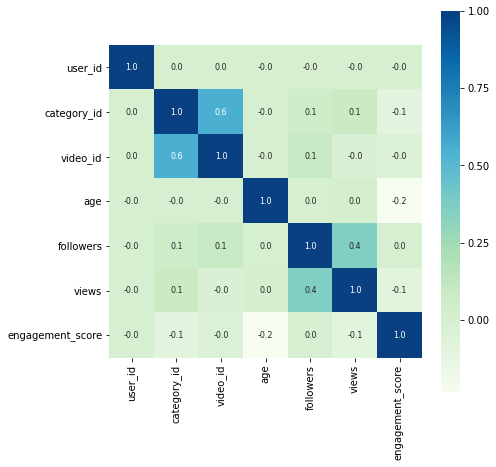

In [9]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='GnBu')

followers and views are correlated with each other

<AxesSubplot:xlabel='views'>

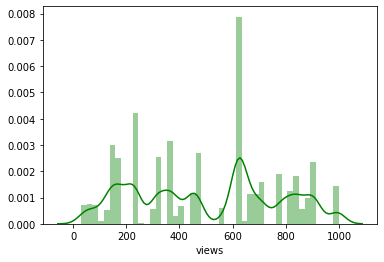

In [10]:
#checking the distribution of the views
sns.distplot(df['views'], color='green')

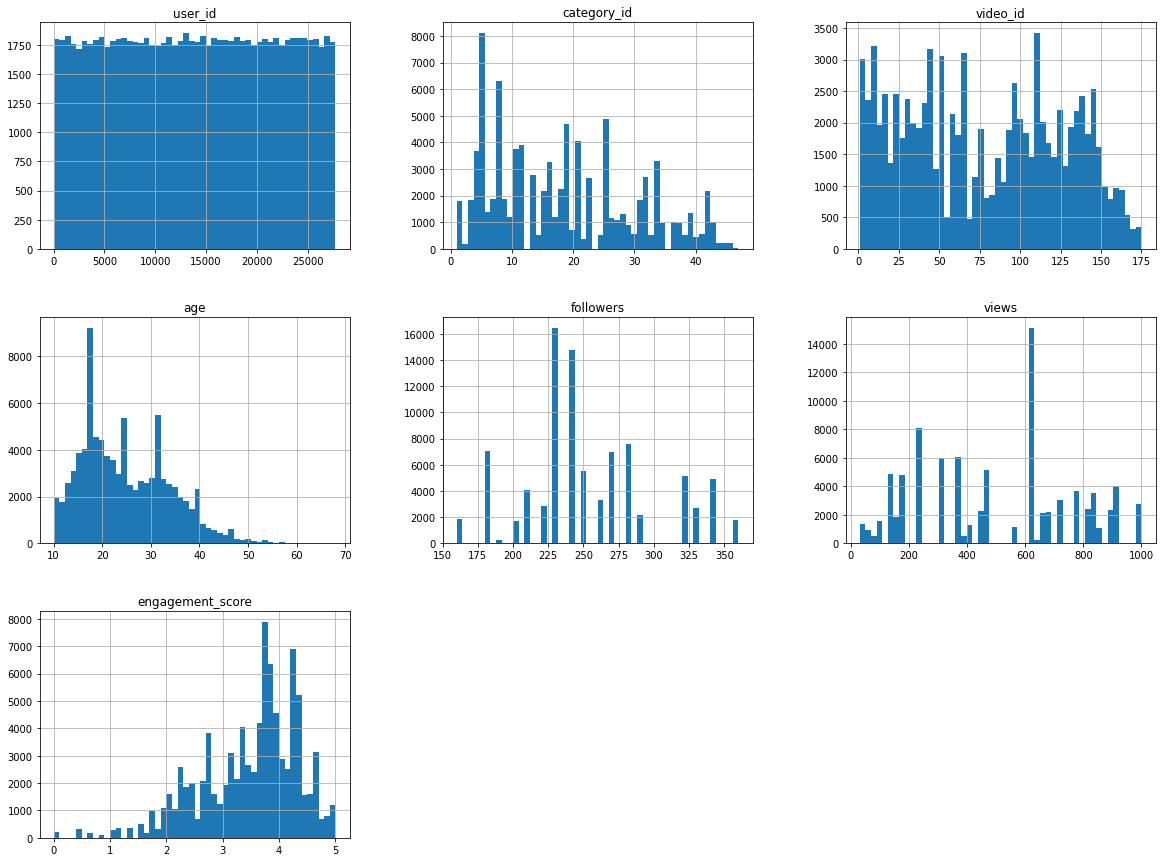

In [11]:
try:
    # We select all rows and all columns after the 6th
    df.iloc[:,:].hist(bins=50, figsize=(20,15))
    plt.show()
except AttributeError:
    pass

In [12]:
#encoding the categorical data
#encoding the "profession" column
df.replace({'profession':{'Student':0,'Working Professional':1,'Other':2}},inplace=True)

#encoding the gender column
df.replace({'gender':{'Male':0,'Female':1}},inplace=True)

In [13]:
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,0,0,180,1000,4.33
1,5304,32,132,14,1,0,330,714,1.79
2,1840,12,24,19,0,0,180,138,4.35
3,12597,23,112,19,0,0,220,613,3.77
4,13626,23,112,27,0,1,220,613,3.13


# Splitting the data and target

In [14]:
X=df.drop(['engagement_score'],axis=1)
y=df['engagement_score']

In [15]:
print(X)

       user_id  category_id  video_id  age  gender  profession  followers  \
0        19990           37       128   24       0           0        180   
1         5304           32       132   14       1           0        330   
2         1840           12        24   19       0           0        180   
3        12597           23       112   19       0           0        220   
4        13626           23       112   27       0           1        220   
...        ...          ...       ...  ...     ...         ...        ...   
89192    23996           15        32   25       0           2        340   
89193    20466           20        47   31       0           2        240   
89194    13655           16        97   25       0           0        270   
89195    24840            9        18   35       0           1        230   
89196    27183           25       150   13       0           0        240   

       views  
0       1000  
1        714  
2        138  
3        613  


In [16]:
print(y)

0        4.33
1        1.79
2        4.35
3        3.77
4        3.13
         ... 
89192    3.91
89193    3.56
89194    4.23
89195    3.77
89196    4.31
Name: engagement_score, Length: 89197, dtype: float64


# Training the model

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [18]:
#Normalize the training data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_whole = sc.transform(X.copy())

#ttransform the test data
test_v = sc.transform(df_t.copy().values)

In [30]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,1.472709,-0.543356,-0.984830,-0.765037,-0.838920,-0.918135,-1.571973,-1.358747
1,0.156363,-0.457790,-1.046707,0.236240,1.192008,1.373193,1.903060,0.467909
2,1.702845,-1.313445,-1.521098,-0.542531,1.192008,-0.918135,0.382733,0.441814
3,0.697719,-1.227880,0.438341,0.347493,1.192008,0.227529,-0.486025,1.038273
4,-0.766679,-0.800052,-1.232339,-0.542531,-0.838920,1.373193,-0.486025,1.179932


In [31]:
pd.DataFrame(y_train).head()

,engagement_score
56985,4.44
26909,2.20
63384,4.53
55773,2.24
60497,3.58


# Model Traning

In [32]:
#loading the Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model1=RandomForestRegressor(n_estimators=120,random_state=42)
model1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

# Evaluate the model

In [34]:
#prediction on training data (Linear Regression)
training_data_prediction=model.predict(X_train)

#R-squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.23905892308451937


In [35]:
#prediction on test data (Linear Regression)
test_data_prediction=model.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.2437948507844987


In [36]:
#prediction on test data (Random Forrest)
test_data_prediction1=model1.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction1)
print("R-squared error:",error_score)

R-squared error: 0.35662032115913267


In [37]:
#Lasso Regression
model2=Lasso()
model2.fit(X_train,y_train)

#prediction on test data
test_data_prediction2=model1.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction2)
print("R-squared error:",error_score)

R-squared error: 0.35662032115913267


In [48]:
# Import Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor  

decision_tree_reg = DecisionTreeRegressor(max_depth=9, random_state=42,criterion='mse')  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [49]:
#prediction on data (Decesion Tree)
test_data_prediction3=decision_tree_reg.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction3)
print("R-squared error:",error_score)

R-squared error: 0.33301854938363495


In [52]:
#importing XGBosst regression model
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42
                    )

regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=7200, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.9,
             reg_lambda=0.6, scale_pos_weight=1, seed=42, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
#prediction on data (xgboost)
test_data_prediction_xg=regr.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction_xg)
print("R-squared error:",error_score)

R-squared error: 0.3471001854204726


# Testing the model with test data

In [20]:
#loading the test data from csv to pandas dataframe
df_test=pd.read_csv('test_1zqHu22.csv')
sample = pd.read_csv("sample_submission_JPlpRcN.csv")

#laoding first five rows of the train data
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [21]:
#encoding the categorical data
#encoding the "profession" column
df_test.replace({'profession':{'Student':0,'Working Professional':1,'Other':2}},inplace=True)

#encoding the gender column
df_test.replace({'gender':{'Male':0,'Female':1}},inplace=True)

In [22]:
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,0,0,180,138
1,89199,11278,34,115,14,0,0,230,840
2,89200,17245,8,110,44,1,1,280,628
3,89201,9851,16,137,18,0,0,270,462
4,89202,16008,34,96,47,1,2,230,840


In [23]:
sample.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [24]:
#delete the row_id from test data
df_t=df_test.drop(['row_id'],axis=1)
df_t.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,0,0,180,138
1,11278,34,115,14,0,0,230,840
2,17245,8,110,44,1,1,280,628
3,9851,16,137,18,0,0,270,462
4,16008,34,96,47,1,2,230,840


In [25]:
df_t.shape

(11121, 8)

In [40]:
#predicting with the Randome Forest regressor
test_pred=model1.predict(test_v)

In [41]:
print(test_pred.shape)

(11121,)


In [42]:
test_pred

array([4.03125   , 3.26066667, 2.6425    , ..., 3.29075   , 3.82375   ,
       3.26058333])

In [43]:
# load row_id of test dataset
test_row_id = pd.read_csv('test_1zqHu22.csv')['row_id']
print(test_row_id.shape)

(11121,)


In [44]:
# save results to csv
subm = pd.DataFrame({'row_id': test_row_id, 'engagement_score': test_pred})
subm = subm[['row_id','engagement_score']]    

filename='submission.csv'
subm.to_csv(filename, index=False)